we have a car dataset , task is to train a knn regression model and predict the price of a future unknown data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data.txt', names=cols)

In [3]:
num_features = ['normalized-losses', 'wheel-base', 'length', 'width','height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[num_features].copy()

replacing the "?" values by NaN

In [4]:
numeric_cars.replace('?', np.nan, inplace=True)

In [5]:
to_numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
numeric_cars[to_numeric_cols] = numeric_cars[to_numeric_cols].astype(float)

replacing the Nan with the columns mean value

In [6]:
numeric_cars.dropna(axis=0, thresh=2, inplace=True)
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

normalisation usiing min_max method

In [7]:
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = numeric_cars['price']

In [8]:
def euclidean(x,y):
    return abs(x*x - y*y)
def srt(x):
    return x[0]

we are dividing the data into train and test by  70:30 split

In [11]:
train_size = int(0.7*len(normalized_cars))
train_set = normalized_cars.iloc[0:train_size]
test_set = normalized_cars.iloc[train_size:]

knn regressor function returns the mean of k nearest neighbors for k = 10 rmse is lowest and it increases with k

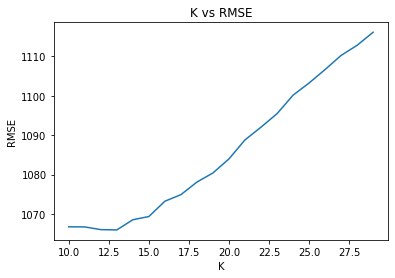

In [12]:
def knnregressor(arr,k):
    final_arr=[]
    for i in test_set.index:
        distance=0
        for j in range(len(arr)-1):
            distance+=euclidean(arr[j],test_set.loc[i][j])
        distance=math.sqrt(distance)
        temp=[distance,test_set.loc[i]["price"]]
        final_arr.append(temp)
    final_arr.sort(key=srt)
    sum=0
    for i in range(k+1):
        sum+=final_arr[i][1]
    return sum/k
ans = []
for k in range(10,30):
        rmse=0
        cnt=0
        temp=[]
        for i in train_set.index:
            x=knnregressor(train_set.loc[i],k)
            y=train_set.loc[i]["price"]
            rmse+=euclidean(x,y)
            cnt+=1
        rmse=math.sqrt(rmse)
        rmse/=cnt
        ans.append([rmse,k])

        
        
k_values = []
rmse_values = []
for i in range(len(ans)):
    rmse_values.append(ans[i][0])
    k_values.append(ans[i][1])



plt.plot(k_values, rmse_values)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('K vs RMSE') 
plt.show()


in cross validation we are using crossvalid and test temp(which are sampled from the train_set) to find the optimal k

In [13]:
#cross validation
def knnregressornew(arr,k,train_new):
    distance=0;
    fin_arr=[]
    for i in train_new.index:
        for j in (range(len(arr)-1)):
            distance+=euclidean(arr[j],train_new.loc[i][j])
        temp=[distance,train_new.loc[i]["price"]]
        fin_arr.append(temp)
    fin_arr.sort(key=srt)
    sum=0
    for i in range(1,k+1):
        sum=sum+fin_arr[i][1]
    return sum/k



dividing into random two groups

In [14]:
ans_arr=[]
for j in [5,10,15,20]:
        crossvalid=train_set.sample(n=j)
        test_temp=train_set.sample(n=20)
        rms=0
        temp=[]
        for k in range(1,10):
            for i in crossvalid.index:
                x=knnregressornew(crossvalid.loc[i],k,test_temp)
                y=crossvalid.loc[i]["price"]
                rms+=euclidean(x,y)
            rms/=j
            rms=math.sqrt(rms)
#             print(k,rms,j)
            temp.append([k,rms,j])
            ans_arr.append(temp)
            temp=[]
            

here we have the mean of rmse scores related to k_values.for k<6 we have mean rmse score lowest 

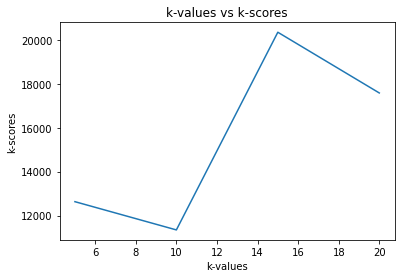

In [15]:
the_k_values = [5,10,15,20]
k_scores = []
for k in the_k_values:
    sum=0
    cnt=0
    for i in range(len(ans_arr)-1):
        if(ans_arr[i][0][2]==k):
            sum+=ans_arr[i][0][1]
            cnt+=1
    sum/=cnt
    #print(sum)
    k_scores.append(sum)
plt.plot(the_k_values, k_scores)
plt.xlabel('k-values')
plt.ylabel('k-scores')
plt.title('k-values vs k-scores') 
plt.show()